<a href="https://colab.research.google.com/github/vassa33/alu-machine_learning/blob/main/Project_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, I will be performing an analysis on transport (vehicles and fuel efficiency).

The dataset: fuel_econ.csv

**Step 1**: Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb

**Step 2**: Import the data

In [ ]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Step 4**: Create Plots

Create diagrams that visualize the relationship between various features (columns) and interpret the diagrams.

Define if the distribution is skewed or symmetric.

In [ ]:
max(fuel_econ.co2)
data = fuel_econ.co2
skewness = stats.skew(data)
print("Skewness:{}".format(skewness))

Skewness:0.2902150653489951


Play around with different bin width sizes to see what best depicts the data.

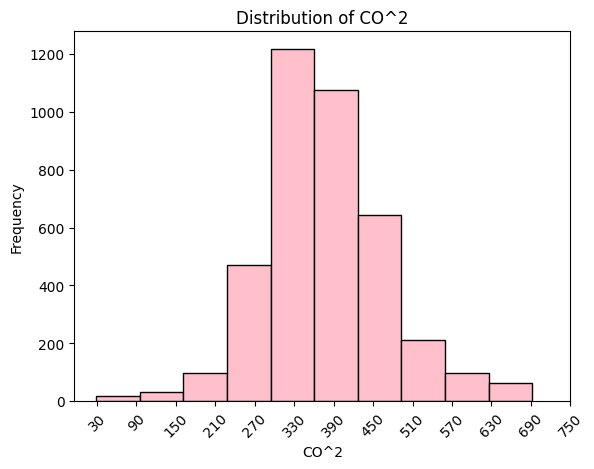

In [70]:
binwidth = 60
plt.hist(fuel_econ.co2, edgecolor="black", color='pink')
plt.xticks(range(30, max(fuel_econ.co2) + binwidth, binwidth))
plt.xlabel("CO^2")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title('Distribution of CO^2')
plt.show()

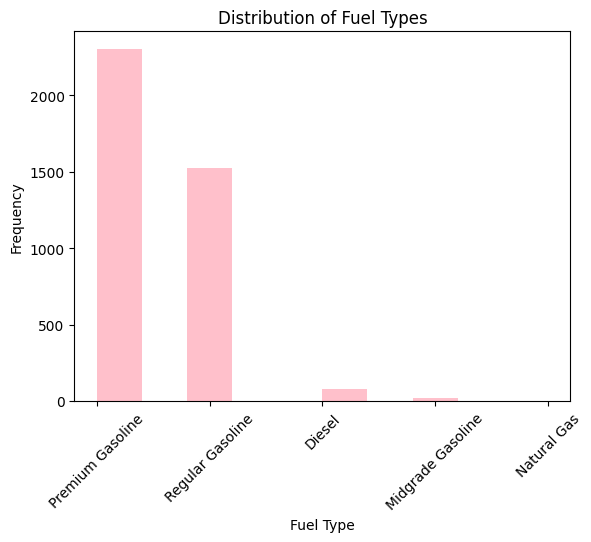

In [ ]:
plt.hist(fuel_econ.fuelType, color='pink')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Distribution of Fuel Types')
plt.show()

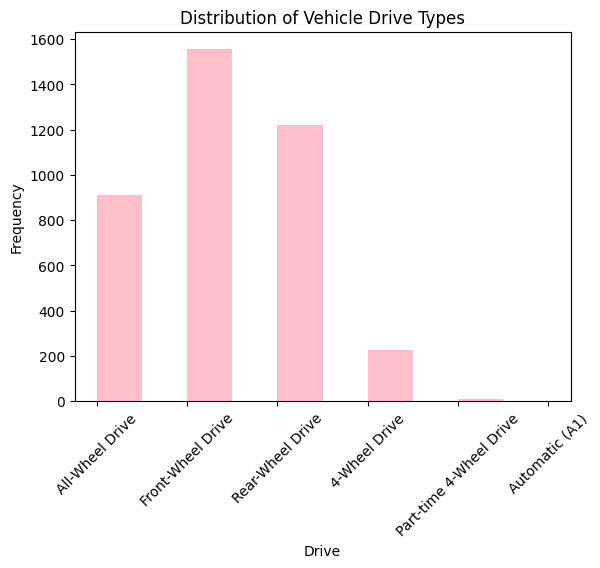

In [ ]:
plt.hist(fuel_econ.drive, color='pink')
plt.ylabel("Frequency")
plt.xlabel("Drive")
plt.xticks(rotation=45)
plt.title('Distribution of Vehicle Drive Types')
plt.show()

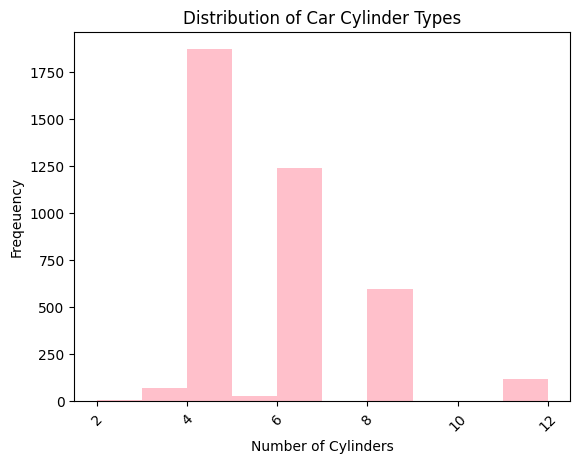

In [ ]:
binwidth = 60
plt.hist(fuel_econ.cylinders, color='pink')
plt.xlabel('Number of Cylinders')
plt.ylabel('Freqeuency')
plt.xticks(rotation=45)
plt.title('Distribution of Car Cylinder Types')
plt.show()

**TO DO: Write Code that will give you the following plot as follows:**

---

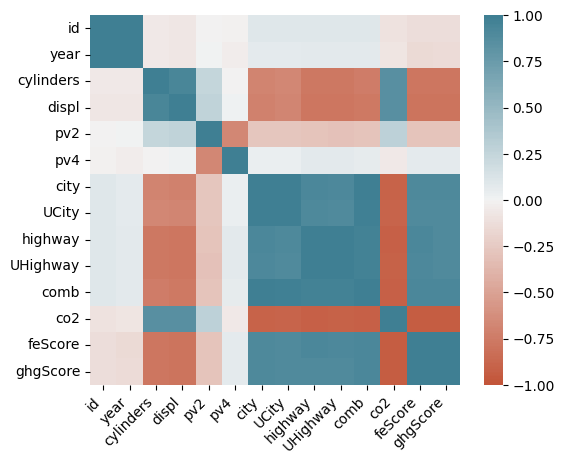

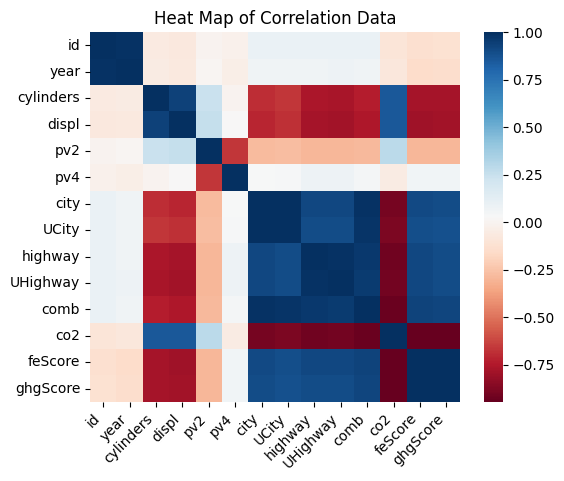

In [75]:
columns = ['id', 'year', 'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway', 'UHighway', 'comb', 'co2', 'feScore', 'ghgScore']

correlation = fuel_econ[columns].corr()

sb.heatmap(correlation, annot=False, cmap='RdBu', square=True)
plt.title('Heat Map of Correlation Data')
plt.xticks(rotation=45, ha='right')
plt.show()

**Finally:** What Columns would you delete (Drop) if the target is the ghg score? Justify your Answer

**Answer**

To avoid multicollinearity, I would drop the columns that are highly correlated such as 'city', 'highway', 'comb', 'co2', 'feScore' and 'UHighway'.

These colums are relatively highly correlated with correlation values ranging between +/- 0.9 and +/- 1.

Heatmap after dropping the above colums:

<ipython-input-74-951a31a79944>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(nfuel_econ.corr(), cmap="RdBu")


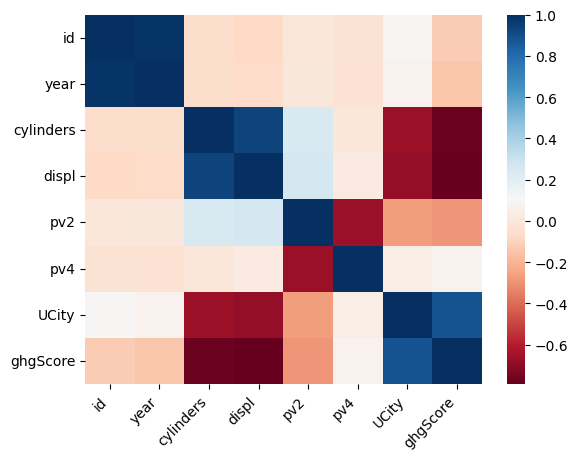

In [74]:
nfuel_econ = fuel_econ.drop(columns=['city', 'highway', 'comb', 'co2', 'feScore', 'UHighway'])

sb.heatmap(nfuel_econ.corr(), cmap="RdBu")
plt.xticks(rotation=45, ha='right')
plt.show()
